In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1)

In [2]:
X, Y = load_planar_dataset()

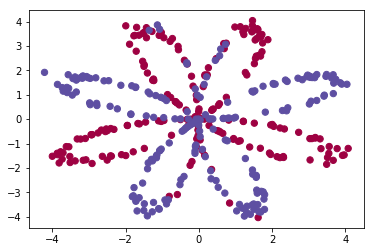

In [3]:
# X --> two rows representing X and Y points
# Y --> label of that points
plt.scatter(X[0,:], X[1,:], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)

In [4]:
shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1]

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


In [5]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T.reshape((m,)))

/srv/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


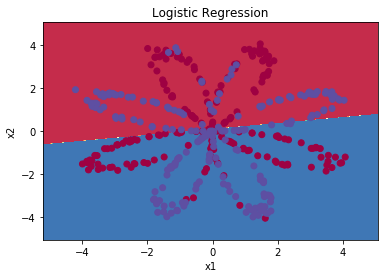

In [6]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [7]:
# Define the layers of the neural network
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [8]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [9]:
# Random Initialization of the parameters
def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(2)
    
    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    
    W2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [10]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.41675785 -0.05626683]
 [-2.1361961   1.64027081]
 [-1.79343559 -0.84174737]
 [ 0.50288142 -1.24528809]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-1.05795222 -0.90900761  0.55145404  2.29220801]]
b2 = [[0.]]


In [11]:
# Forward propagation
def forward_propagation(X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }
    
    return A2, cache

In [12]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700113 -1.3076660128732143 0.21287768171914198


In [13]:
def compute_cost(A2, Y):
    
    m = Y.shape[1]
    
    logprobs = Y * np.log(A2) + (1 - Y) * np.log(1 - A2)
    cost = - np.sum(logprobs) / m
    
    cost = np.squeeze(cost)
    
    assert(isinstance(cost, float))
    
    return cost

In [14]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess)))

cost = 0.6930587610394646


In [15]:
def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]
    
    A2 = cache["A2"]
    A1 = cache["A1"]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2,
    }
    
    return grads

In [16]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [17]:
def update_parameters(parameters, grads, learning_rate=1.2):
    
    W1 = parameters["W1"] - learning_rate * grads["dW1"]
    W2 = parameters["W2"] - learning_rate * grads["dW2"]
    
    b1 = parameters["b1"] - learning_rate * grads["db1"]
    b2 = parameters["b2"] - learning_rate * grads["db2"]
    
    params = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2,
    }
    
    return params

In [18]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [23]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    
    # Step 1: Get layer sizes
    layers = layer_sizes(X, Y)
    
    np.random.seed(3)
    n_x = layers[0]
    n_y = layers[2]
    
    # Step 2: Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(0, num_iterations):
        
        # Step 3: Forward propagation
        A2, cache = forward_propagation(X, parameters)
        
        # Step 3: Compute cost
        cost = compute_cost(A2, Y)
        
        # Step 4: Backward propagation
        grads = backward_propagation(parameters, cache, X, Y)
        
        # Step 5: Update parameters
        parameters = update_parameters(parameters, grads)
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        
    return parameters

In [24]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.041960
Cost after iteration 1000: 0.000266
Cost after iteration 2000: 0.000134
Cost after iteration 3000: 0.000090
Cost after iteration 4000: 0.000068
Cost after iteration 5000: 0.000054
Cost after iteration 6000: 0.000045
Cost after iteration 7000: 0.000039
Cost after iteration 8000: 0.000034
Cost after iteration 9000: 0.000030
W1 = [[-0.89587042  1.18044635]
 [-2.14783312  1.70666862]
 [-1.50260821 -1.21347886]
 [ 0.80826745 -1.65434514]]
b1 = [[ 0.19050922]
 [ 0.01614166]
 [-0.34103273]
 [-0.25208981]]
W2 = [[-2.90757381 -3.18177289  0.36186225  4.50758023]]
b2 = [[0.24451252]]


In [35]:
def predict(parameters, X):
    
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5) * 1
    
    return predictions

In [36]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0: 1.127380
Cost after iteration 1000: 0.288553
Cost after iteration 2000: 0.276386
Cost after iteration 3000: 0.268077
Cost after iteration 4000: 0.263069
Cost after iteration 5000: 0.259617
Cost after iteration 6000: 0.257070
Cost after iteration 7000: 0.255105
Cost after iteration 8000: 0.253534
Cost after iteration 9000: 0.252245


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

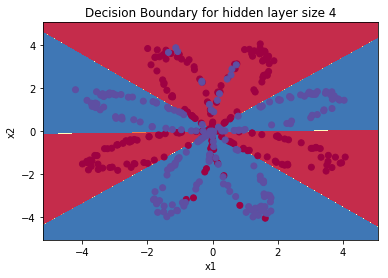

In [38]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [44]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


Accuracy for 1 hidden units: 61.5 %
Accuracy for 2 hidden units: 70.5 %
Accuracy for 3 hidden units: 66.25 %
Accuracy for 4 hidden units: 90.75 %
Accuracy for 5 hidden units: 91.0 %
Accuracy for 20 hidden units: 91.5 %
Accuracy for 50 hidden units: 90.75 %


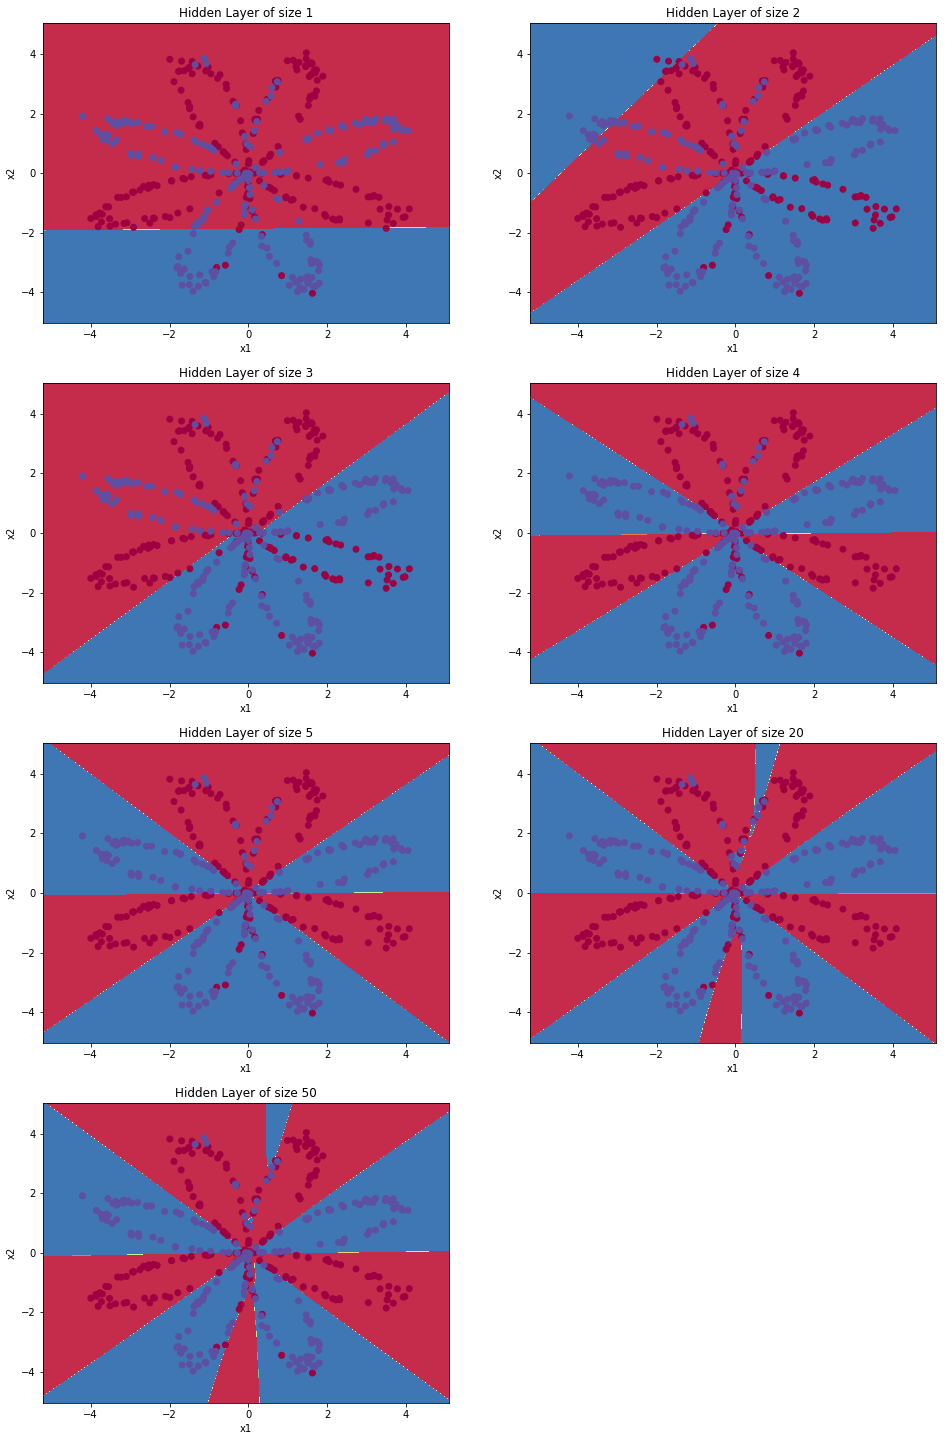

In [43]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

Shape of X: (2, 200)
Shape of Y: (1, 200)
No. of training examples: 200


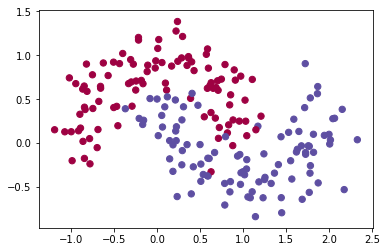

In [52]:
# Performance on other datasets
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

print("Shape of X: (%d, %d)" % (X.shape[0], X.shape[1]))
print("Shape of Y: (%d, %d)" % (Y.shape[0], Y.shape[1]))

m = X.shape[1]
print("No. of training examples: %d" % m)

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);

In [53]:
# Using Logisitic Regression to predict classes
model = sklearn.linear_model.LogisticRegressionCV()
model.fit(X.T, Y.T)

/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/srv/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

Accuracy: 82%


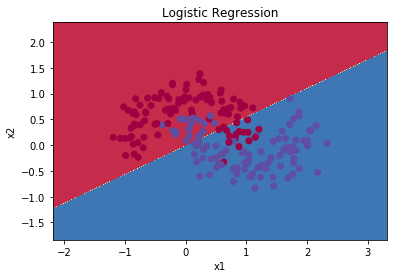

In [67]:
plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.title("Logistic Regression")

pred = model.predict(X.T)
acc = np.dot(Y, pred) + np.dot(1 - Y, 1 - pred) / m
print("Accuracy: %d" % acc + "%")

Accuracy for 1 hidden units: 83.5 %
Accuracy for 2 hidden units: 88.0 %
Accuracy for 3 hidden units: 96.0 %
Accuracy for 4 hidden units: 96.0 %
Accuracy for 5 hidden units: 96.5 %
Accuracy for 20 hidden units: 96.5 %
Accuracy for 50 hidden units: 96.0 %


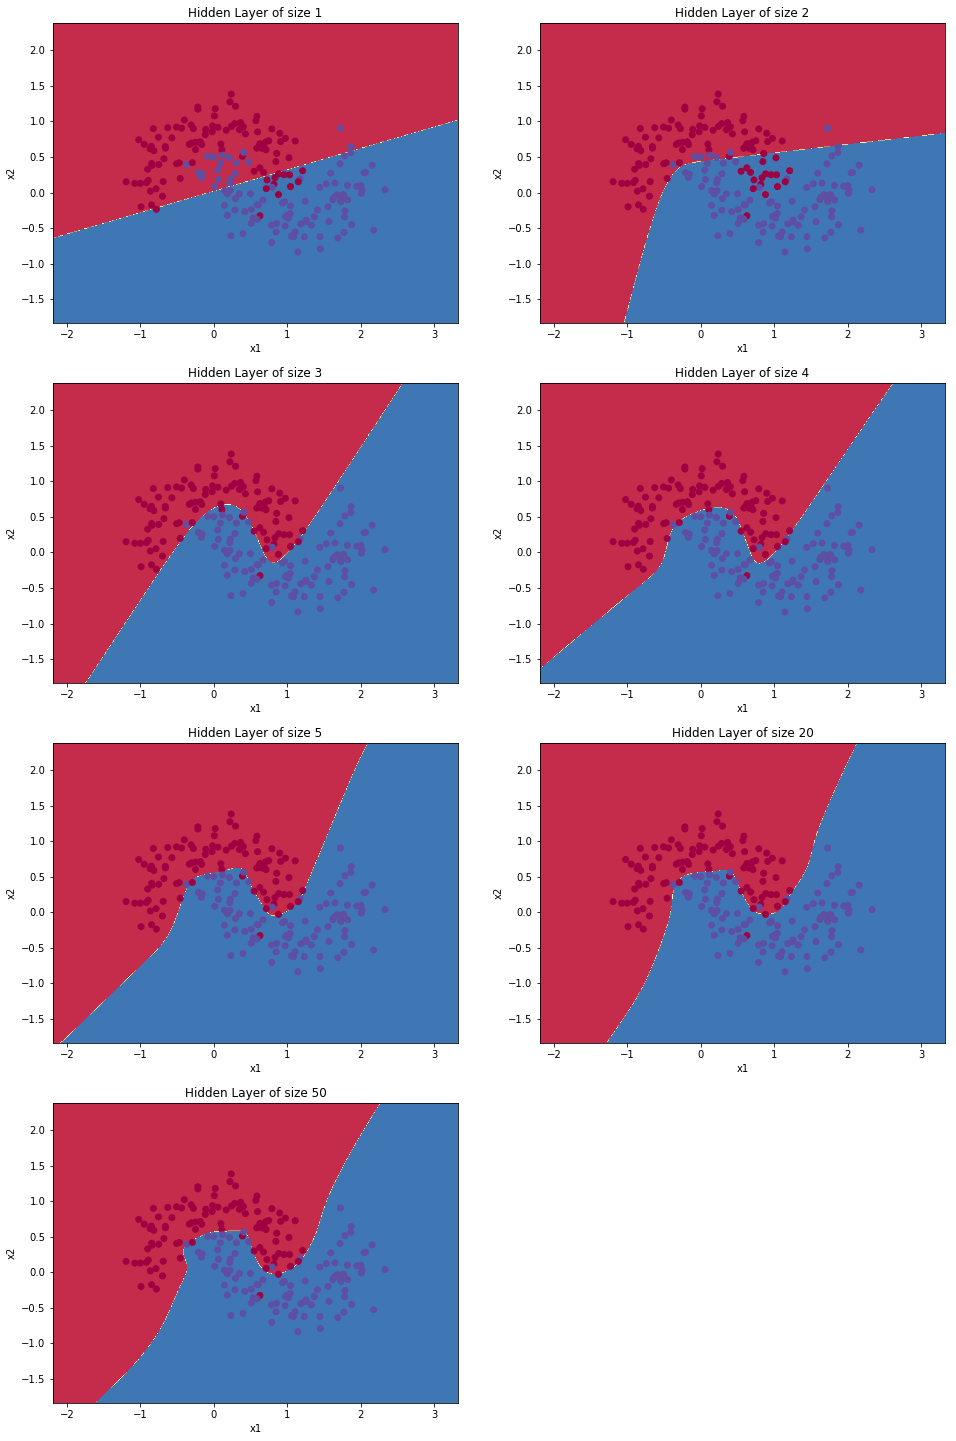

In [68]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))